In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [18]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [19]:
df_vendas = pd.DataFrame(dados_vendas)


In [23]:
month_mapping = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}
df_vendas['month_int'] = df_vendas['mes'].map(month_mapping).astype('int64')
df_vendas.drop(columns='mes')

,vendas,month_int
0,2000,1
1,2200,2
2,2300,3
3,2500,4
4,2600,5
5,2700,6
6,2800,7
7,2900,8
8,3000,9
9,3100,10


In [25]:
df_vendas.head(12)

,mes,vendas,month_int
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [32]:
# Dividir os dados em conjuntos de treino e teste
X = df_vendas[['month_int']]
Y = df_vendas['vendas']

In [33]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=51)

In [34]:
# Treinar o algoritmo de Regressão Linear - Modelo
model = LinearRegression().fit(X_train, Y_train)

In [36]:
# Gerar predições com o conjunto de teste - Modelo 1
y_pred = model.predict(X_test)
y_pred

array([2420.        , 2876.66666667, 2305.83333333, 2762.5       ])

In [42]:
model.score(X_train, Y_train)

0.990709949854843

In [44]:
model.score(X_test, Y_test)

0.9631440781440782

In [46]:
mean_absolute_error(Y_test, y_pred)

36.66666666666663

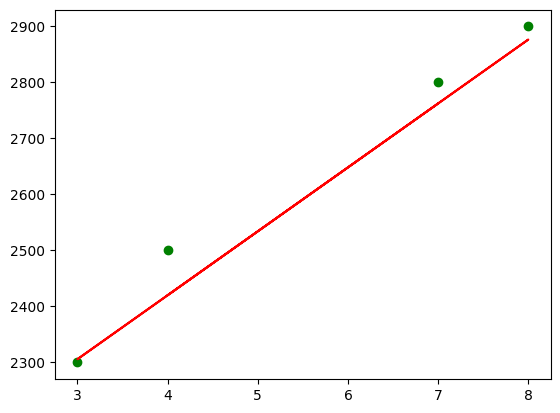

In [52]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, Y_test, color='g')  
plt.plot(X_test, y_pred, color='r')

In [70]:
# Prever vendas para o mês de Dezembro
y_pred = model.predict(pd.DataFrame({'month_int': [12]}))
y_pred

array([3333.33333333])